# Gitcoin Dynamical Network generation

03dec2020

---

On this notebook, we use a cadCAD model for retrieving the first 2000 contribution events from Gitcoin Grants Round 7. We generate a dynamical network where we have a NetworkX Digraph for each sequential point. 

We also calculate the CLR match and the theoretical match (match before normalization) for each point on time. We perform a A/B test in regards to the presence of the user pairwise comparison term.



## Dependences & parameters

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import plotly.express as px
import pandas as pd
import inequality_coefficients as ineq

## Execute simulation


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (100, 5, 1, 12)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
Total execution time: 0.19s


## Data analysis



In [3]:
df = result.loc[(0, 0, 1, slice(None))]


In [4]:
### Quadratic Funding with Pairwise term

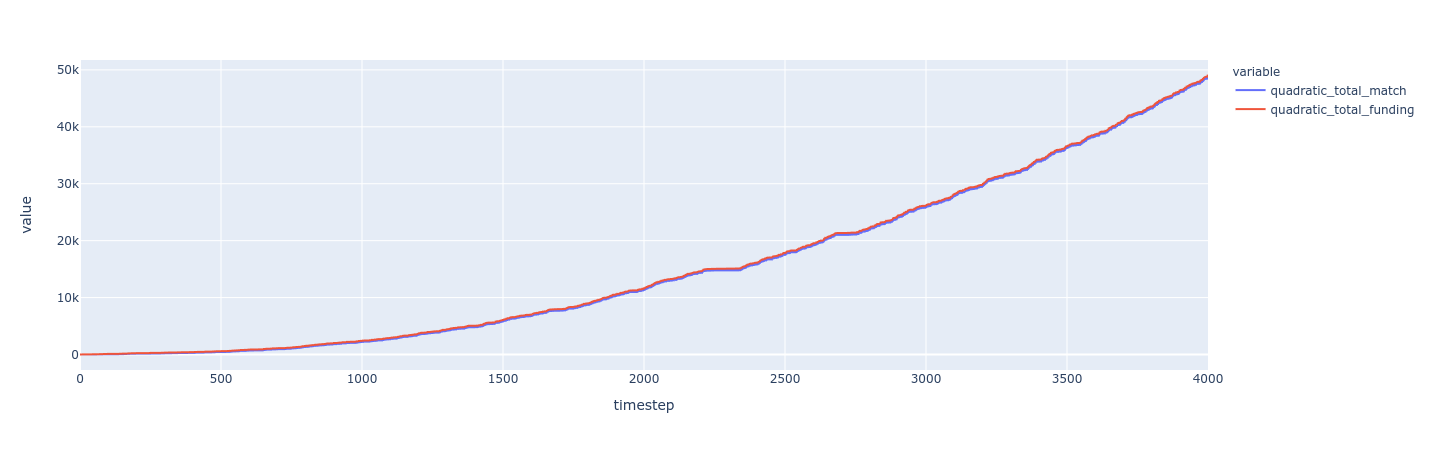

In [5]:
fig = px.line(df.reset_index(),
              x='timestep',
              y=['quadratic_total_match', 'quadratic_total_funding'])

fig.show()

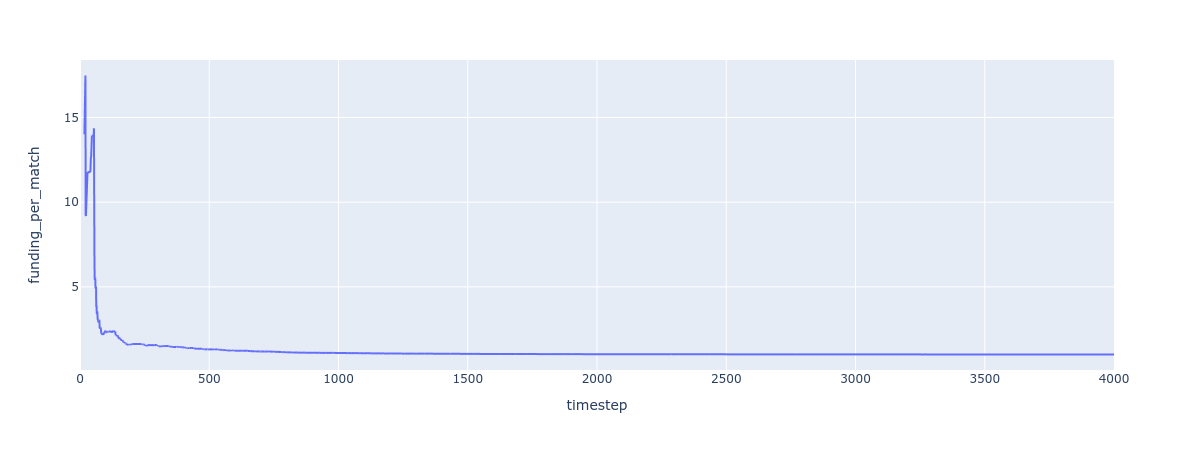

In [6]:
y = df.quadratic_total_funding / df.quadratic_total_match
y.name = 'funding_per_match'
px.line(y.reset_index(),
        x='timestep',
        y='funding_per_match')

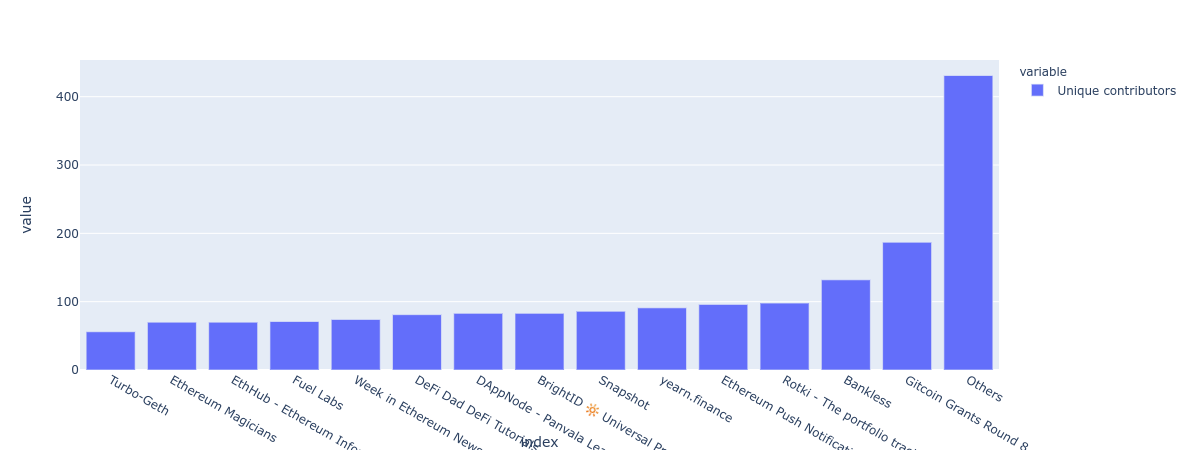

In [8]:
metric_df = pd.DataFrame(df.iloc[4000].contributions)

s = metric_df.groupby('grant').contributor.nunique().sort_values()

N = 14
top_N = s.iloc[-N:]
other_index = ~metric_df.grant.isin(top_N.index)
remaining = metric_df.contributor[other_index].nunique()
metrics = pd.Series({**top_N.to_dict(), 'Others': remaining}).sort_values()
metrics.name = 'Unique contributors'
px.bar(metrics)

In [9]:
from tqdm.auto import tqdm
N = 14

output = []
output_2 = []
for i, row in tqdm(df.iterrows()):
    if i == 0:
        continue
    metric_df = pd.DataFrame(row.contributions)
    s = metric_df.groupby('grant').amount.sum().sort_values()
    
    top_N = s.iloc[-N:]
    remaining = s.iloc[:N].sum()
    metrics = pd.Series({**top_N.to_dict(), 'Others': remaining}).sort_values()
    el = {**top_N.to_dict(), 'Others': remaining.sum()}
    output.append(el)
    output_2.append(s.to_dict())



In [ ]:
fig_df = (pd.DataFrame(output)
            .unstack()
            .reset_index()
            .rename(columns={'level_0': 'grant',
                             'level_1': 'timestep',
                             0: 'funding'})
            .dropna()
            .sort_values(['timestep', 'funding']))

fig = px.bar(fig_df,
             x='grant',
             y='funding',
             animation_frame='timestep',
             title='Donation for the top 14 grants',
             labels={'funding': 'Donation per grant (USDT)'}
             )

fig.show()

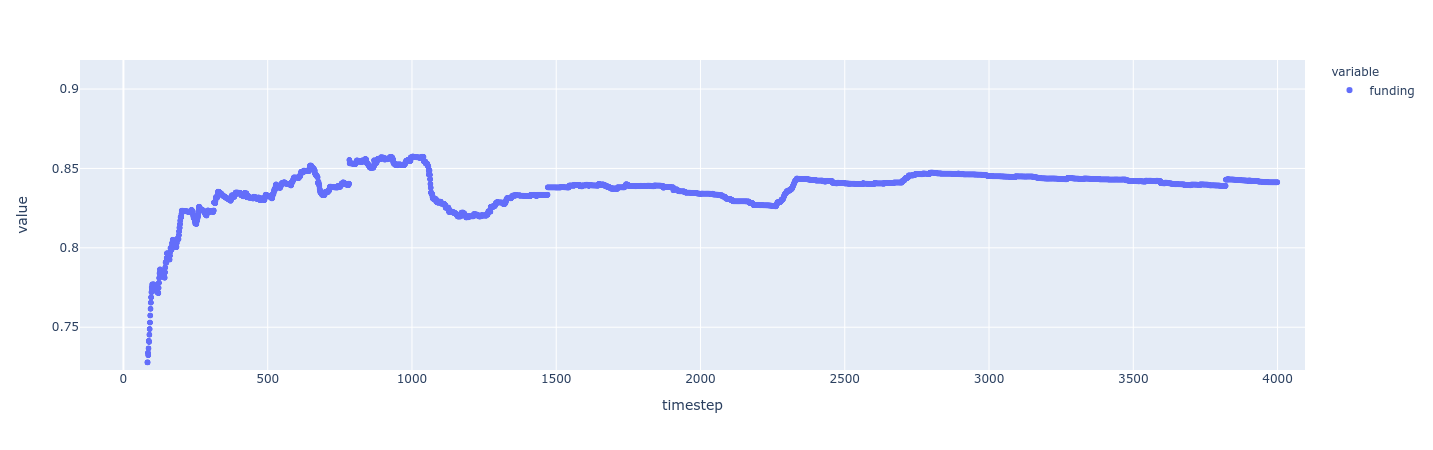

In [10]:
fig_df = (pd.DataFrame(output_2)
            .unstack()
            .reset_index()
            .rename(columns={'level_0': 'grant',
                             'level_1': 'timestep',
                             0: 'funding'})
            .dropna()
            .sort_values(['timestep', 'funding']))
y = fig_df.groupby('timestep').funding.apply(lambda x: ineq.gini(x) / len(x))
px.scatter(y)

In [17]:
N = 14

output = []
output_3 = []
for i, row in tqdm(df.iterrows()):
    obj = row.quadratic_funding_per_grant
    s = pd.Series(obj).sort_values()
    
    top_N = s.iloc[-N:]
    remaining = s.iloc[:N]
    el = {**top_N.to_dict(), 'Others': remaining.sum()}
    output.append(el)
    output_3.append(s.to_dict())



/home/danlessa/.anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [18]:
output = []
output_4 = []
for i, row in tqdm(df.iterrows()):
    obj = row.simple_quadratic_funding_per_grant
    s = pd.Series(obj).sort_values()
    
    top_N = s.iloc[-N:]
    remaining = s.iloc[:N]
    el = {**top_N.to_dict(), 'Others': remaining.sum()}
    output.append(el)
    output_4.append(s.to_dict())

/home/danlessa/.anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [ ]:
fig_df = (pd.DataFrame(output)
            .unstack()
            .reset_index()
            .rename(columns={'level_0': 'grant',
                             'level_1': 'timestep',
                             0: 'funding'})
            .dropna()
            .sort_values(['timestep', 'funding']))

fig = px.bar(fig_df,
             x='grant',
             y='funding',
             animation_frame='timestep',
             title='Funding for the top 14 grants',
             labels={'funding': 'Funding per grant (USDT)'}
             )

fig.show()

In [19]:
fig_df_2 = (pd.DataFrame(output_2)
            .unstack()
            .reset_index()
            .rename(columns={'level_0': 'grant',
                             'level_1': 'timestep',
                             0: 'donations'})
            .dropna()
            .sort_values(['timestep', 'donations'])
            .set_index(['grant', 'timestep']))


fig_df_3 = (pd.DataFrame(output_3)
            .unstack()
            .reset_index()
            .rename(columns={'level_0': 'grant',
                             'level_1': 'timestep',
                             0: 'funding'})
            .dropna()
            .sort_values(['timestep', 'funding'])
            .set_index(['grant', 'timestep']))

fig_df_4 = (pd.DataFrame(output_4)
            .unstack()
            .reset_index()
            .rename(columns={'level_0': 'grant',
                             'level_1': 'timestep',
                             0: 'simple_funding'})
            .dropna()
            .sort_values(['timestep', 'simple_funding'])
            .set_index(['grant', 'timestep']))

y_2 = fig_df_2.groupby('timestep').donations.apply(lambda x: ineq.gini(x) / len(x))
y_3 = fig_df_3.groupby('timestep').funding.apply(lambda x: ineq.gini(x) / len(x))
y_4 = fig_df_4.groupby('timestep').simple_funding.apply(lambda x: ineq.gini(x) / len(x))

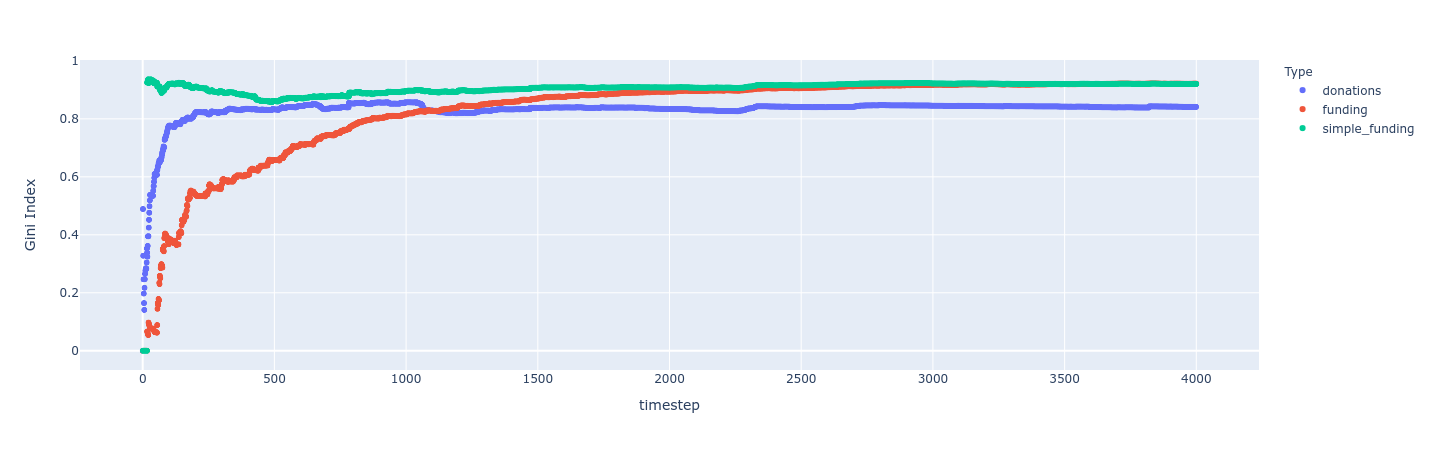

In [21]:
fig_df = pd.DataFrame([y_2, y_3, y_4]).unstack().reset_index().rename(columns={0: 'gini'})
px.scatter(fig_df,
           x='timestep',
           y='gini',
           color='level_1',
           labels={
               'level_1': 'Type',
               'gini': 'Gini Index',
               'donations': 'Total donation per grant',
               'funding': 'Total quadratic funding per grant',
               'simple_funding': 'Total quadratic funding per grant (no pair-wise factor)'
           })

### Quadratic Funding without Pairwise term

In [ ]:
fig = px.line(df.reset_index(),
              x='timestep',
              y=['simple_quadratic_total_match', 'simple_quadratic_total_funding'])
fig.show()

In [ ]:
y = df.simple_quadratic_total_funding / df.simple_quadratic_total_match
y.name = 'funding_per_match'
px.line(y.reset_index(),
        x='timestep',
        y='funding_per_match')

In [ ]:
from utils import plot_contributions
c = df.contributions.iloc[-1]
plot_contributions(c)

In [ ]:
from utils import create_video_snap
import os
os.chdir('..')

create_video_snap(df.contributions.iloc[1:])


In [ ]:
g_df = pd.DataFrame(c)

contributor_nodes = g_df.contributor.values
grant_nodes = g_df.grant.values
amount_edges = g_df.amount.values
sybil_edges = g_df.sybil_score.values

G = nx.Graph()
for i in contributor_nodes:
    G.add_node(i)
    G.nodes[i]['type']= 'Contributor'

for j in grant_nodes:
    G.add_node(j)
    G.nodes[j]['type']= 'Grant'

for i,j,p in zip(contributor_nodes,grant_nodes,range(0,len(grant_nodes))):
    G.add_edge(i, j)
    G.edges[(i,j)]['amount'] = amount_edges[p]
    G.edges[(i,j)]['type'] = 'support'
    G.edges[(i,j)]['sybil_score'] = sybil_edges[p]
    
    


In [ ]:
donors = [] 
for i in G.nodes:
    if G.nodes[i]['type'] == 'Contributor':
        donors.append(i)
        
unique_donors = set(donors)